<h1>Lab : simplified JPEG encoder/decoder</h1>

# VERY IMPORTANT: Take time to read the guidance before coding.

**Read the guidance**

**Read the topic (.pdf file) first**

**Functions to be implemented:**
  - rlencode (in Section 1)
  - count_symbols (in Section 1)
  - and also the 'main' functions (in Section 3)

**Some given functions:** (in Section 2)
  - zigzag
  - functions related to Huffman coding, such as ``construct_huffman_table, encode_huffman, decode_huffman``

**Some useful functions:**
  - imshow()
  - img = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2GRAY)
  - cv2.dct

# **You can directly go to Section 3 and code there**

**Import the libs**

In [9]:
import numpy as np
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from typing import List, Tuple, Any, Dict, Optional

import cv2

def show(img:np.ndarray):
    im = Image.fromarray(img)
    print(im.size, im.mode, im.format, img.min(),  img.max())
    display(im)

def load_from_url(url: str) -> np.ndarray:
    return np.asarray(Image.open(requests.get(url, stream=True).raw))

def debug_ndarray(arr:np.ndarray, name:str='') -> None:
    print(name, arr.shape, arr.dtype, arr.min(), arr.max())

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

# 1. Functions to be implemented

*   rlencode: Run length coding
*   count_symbols: this will be used for Huffman coding
*   zigzag: Implementing this function is optional, as there is a relatively simple 'manual' method available for accomplishing the task (see the begining of Section 3)
# *   **Note: however, you dont need to implement these functions immediately. You can go to Section 3 to implement different first steps of JPEG: block devivision, centering, DCT, quantification.**





In [10]:
def zigzag(matrix: np.ndarray) -> np.ndarray:
    """
    computes the zigzag of a quantized block
    :param numpy.ndarray matrix: quantized matrix
    :returns: zigzag vectors in an array
    """
    # initializing the variables
    h = 0
    v = 0
    v_min = 0
    h_min = 0
    v_max = matrix.shape[0]
    h_max = matrix.shape[1]
    i = 0
    output = np.zeros((v_max * h_max))

    while (v < v_max) and (h < h_max):
        if ((h + v) % 2) == 0:  # going up
            if v == v_min:
                output[i] = matrix[v, h]  # first line
                if h == h_max:
                    v = v + 1
                else:
                    h = h + 1
                i = i + 1
            elif (h == h_max - 1) and (v < v_max):  # last column
                output[i] = matrix[v, h]
                v = v + 1
                i = i + 1
            elif (v > v_min) and (h < h_max - 1):  # all other cases
                output[i] = matrix[v, h]
                v = v - 1
                h = h + 1
                i = i + 1
        else:  # going down
            if (v == v_max - 1) and (h <= h_max - 1):  # last line
                output[i] = matrix[v, h]
                h = h + 1
                i = i + 1
            elif h == h_min:  # first column
                output[i] = matrix[v, h]
                if v == v_max - 1:
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif (v < v_max - 1) and (h > h_min):  # all other cases
                output[i] = matrix[v, h]
                v = v + 1
                h = h - 1
                i = i + 1
        if (v == v_max - 1) and (h == h_max - 1):  # bottom right element
            output[i] = matrix[v, h]
            break
    return output

escape_value = 257

def rlencode(data:list, symbol:int=0, escape=escape_value) -> np.ndarray:
    '''
    Encode a list of values using run length encoding
    when `symbol` is encountered,
    the next value is `escape` followed by the number of `symbol`.
    '''
    out = []
    ###
    #TODO
    ###

    count = 1

    for i in range(1, len(data)):
        if data[i] == data[i - 1] and data[i] == symbol:
            count += 1
        else:
            if count > 1:
                out.extend([escape, count, symbol])
            else:
                out.append(data[i - 1])
            count = 1

    if count > 1:
        out.extend([escape, count, symbol])
    else:
        out.append(data[-1])
    return np.array(out)

def count_symbols(data:list) -> Dict[Any, int]:
    '''
    Compute the frequency of each value in the list
    '''
    freq = {}
    ###
    #TODO
    ###

    for value in data:
        freq[value] = freq.get(value, 0) + 1
    return freq


#testing
freq = count_symbols([0, 0, 0, 0, 1, 1, 1, 2, 2, 3])
print(freq)
#'output: {0: 4, 1: 3, 2: 2, 3: 1}'

# Function to reverse Run-Length Coding
def rldecode(encoded, escape=escape_value):
    decoded = []
    i = 0
    while i < len(encoded):
        if encoded[i] == escape:
          for k in range(int(encoded[i+1])):
            decoded.append(0)
          i += 3
        else:
          decoded.append(encoded[i])
          i += 1
    return np.array(decoded)

liste_test = [0,0,0,0,0,0,2,2,2,2,4,4,3,1,1,1]
test_matrix = np.round(np.random.rand(64)*10) * [0, 0, 0, 0, 1, 1, 1, 2,
                                                  0, 0, 0, 0, 0, 1, 1, 2,
                                                  0, 0, 0, 0, 0, 0, 1, 2,
                                                  0, 0, 0, 1, 1, 1, 1, 2,
                                                  0, 0, 1, 2, 1, 1, 1, 2,
                                                  0, 0, 0, 0, 0, 0, 0, 2,
                                                  0, 0, 0, 0, 1, 1, 1, 2,
                                                  0, 0, 0, 0, 1, 1, 1, 2]
encoded_test_matrix = rlencode(liste_test)

print(liste_test)
print(encoded_test_matrix)
print(rldecode(encoded_test_matrix))

{0: 4, 1: 3, 2: 2, 3: 1}
[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1]
[257   6   0   2   2   2   2   4   4   3   1   1   1]
[0 0 0 0 0 0 2 2 2 2 4 4 3 1 1 1]


#2. Given functions

**Huffman tree**

To obtain the Huffman code, it is necessary to construct a (binary) Huffman tree.
This tree is constructed from a list of leaves (symbols) and internal nodes (sum of the weights of the children).
Each node is associated with a value which is the sum of the values of its children.
The leaves correspond to symbols and are associated with their number of occurrences in the vector.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Huffman_tree_2.svg/1200px-Huffman_tree_2.svg.png" width=500>

Huffman encoding involves counting the number of occurrences of each character in a sentence and representing each character as a leaf node on a tree with a weight equal to its occurrence count. The tree is constructed by combining the two nodes with the lowest weights at each step until only one node, the root of the tree, remains.

In [11]:
def compute_huffman_tree(data:list, freq:Optional[dict]=None) -> Tuple[int, Any, Any]:
    '''
    Compute a huffman tree from a frequency table of values
    Return the root node of the tree
    '''
    if freq is None:
        freq: Dict[Any, int] = count_symbols(data)

    # create a list of nodes
    nodes = []
    for symbol, freq in freq.items():
        nodes.append((freq, symbol))

    # sort the list of nodes by count
    nodes.sort(key=lambda x: x[0])

    # create a tree
    while len(nodes) > 1:
        # get the two lowest frequency nodes
        left, right = nodes[:2]

        # create a new node with the sum of the frequencies
        new_node_count = left[0] + right[0]
        new_node = (new_node_count, left, right)
        # remove the two lowest frequency nodes
        nodes = nodes[2:]
        # insert the new node
        nodes.append(new_node)
        # sort the nodes by frequency
        nodes.sort(key=lambda x: x[0])

    # return the root node
    return nodes[0]

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)

from pprint import pprint

data_tree = compute_huffman_tree(data)
pprint(data_tree)

(36,
 (16,
  (8, (4, 'a'), (4, 'e')),
  (8, (4, (2, 't'), (2, 'h')), (4, (2, 'i'), (2, 's')))),
 (20,
  (8,
   (4, (2, 'n'), (2, 'm')),
   (4, (2, (1, 'x'), (1, 'p')), (2, (1, 'l'), (1, 'o')))),
  (12, (5, (2, (1, 'u'), (1, 'r')), (3, 'f')), (7, ' '))))


**Huffman coding table**

Read and test the following functions

In [12]:
def display_table(lines, code:dict, sep='\t'):
    '''
    Display a table of data with columns aligned
    '''
    cols_width = [max(len(str(x)) for x in col) for col in zip(*lines)]
    for line in lines:
        # adjust each column to its max width
        print(*[x.rjust(w) for x, w in zip(line, cols_width)], sep=sep)

def display_huffman_table(data, code:dict, sep='\t'):
    counts: dict = count_symbols(data)
    total = sum(counts.values())
    lines = [('Symbol', 'Code', 'Count', 'Frequency')]
    tmp = sorted(list(counts.keys()), key=lambda x: counts[x], reverse=True)
    for k in tmp:
        symbol = f"`{k}`"
        symbol_code = str(counts[k])
        count = str(code[k])
        freq = str(round(100 * counts[k] / total, 2))+'%'
        lines.append((symbol, symbol_code, count, freq))
    display_table(lines, code, sep=sep)

def bintree_to_table(node, path=None, left='0', right='1') -> Dict[str, str]:
    '''
    Build a huffman table from a huffman tree
    Return a dictionary of symbol:code
    '''
    if path is None:
        path = ''
    table = {}
    if len(node) == 2: # leaf node
        count, symbol = node
        table[symbol] = path
    else: # internal node
        node_left, node_right = node[1], node[2]
        left_path = bintree_to_table(node_left, path + left, left=left, right=right)
        right_path = bintree_to_table(node_right, path + right, left=left, right=right)
        table.update(left_path)
        table.update(right_path)

    return table

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
data_tree = compute_huffman_tree(data)
data_table = bintree_to_table(data_tree)

# display the huffman table
display_huffman_table(data, data_table)


Symbol	Code	Count	Frequency
   ` `	   7	  111	   19.44%
   `a`	   4	  000	   11.11%
   `e`	   4	  001	   11.11%
   `f`	   3	 1101	    8.33%
   `t`	   2	 0100	    5.56%
   `h`	   2	 0101	    5.56%
   `i`	   2	 0110	    5.56%
   `s`	   2	 0111	    5.56%
   `n`	   2	 1000	    5.56%
   `m`	   2	 1001	    5.56%
   `x`	   1	10100	    2.78%
   `p`	   1	10101	    2.78%
   `l`	   1	10110	    2.78%
   `o`	   1	10111	    2.78%
   `u`	   1	11000	    2.78%
   `r`	   1	11001	    2.78%


***Take time to test the three following functions, you will use them for Huffman codage/decodage***

In [13]:
def construct_huffman_table(data:list) -> dict:
    '''
    Encode a list of values using huffman encoding and return the huffman table
    '''
    tree = compute_huffman_tree(data)
    table = bintree_to_table(tree)
    return table

def encode_huffman(data: list, table: dict) -> str:
    '''
    Encode a list of values using the huffman table dictionary
    Return the encoded string
    '''
    out = []
    for i in data:
        out.extend(table[i])
    out = ''.join(out) # list to string
    return out

def decode_huffman(encoded:str, table: dict) -> np.ndarray:
    '''
    Decode a list of values using huffman code dictionary
    '''
    data = []
    i = 0
    while i < len(encoded):
        for k, v in table.items():
            if encoded[i:].startswith(v): # prefix match
                data.append(k)
                i += len(v)
                break
    return np.array(data)

# testing
sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
table = construct_huffman_table(data)
print("Test 1")
print(table)

# Testing
print("Test 2")
data = [0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 3]
data_table = construct_huffman_table(data)
print('Original :', data)

encoded = encode_huffman(data, data_table)
print('Encoded  :', encoded)

decoded = decode_huffman(encoded, data_table)
print('Decoded  :', decoded)


Test 1
{'a': '000', 'e': '001', 't': '0100', 'h': '0101', 'i': '0110', 's': '0111', 'n': '1000', 'm': '1001', 'x': '10100', 'p': '10101', 'l': '10110', 'o': '10111', 'u': '11000', 'r': '11001', 'f': '1101', ' ': '111'}
Test 2
Original : [0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 3]
Encoded  : 1000111110101011011010001
Decoded  : [0 1 0 0 0 0 0 2 0 4 4 2 3]


# 3. TODO: Codage/Decodage

In [14]:
# ZigZag example
# Function to reverse ZigZag
def reverse_zigzag(flat):
    result = np.zeros((8, 8), dtype=np.float32)
    for k in range(64):
      result[lig[k]-1,col[k]-1] = flat[k]
    return result

# This will be used for of ZigZag...
col = np.array([1, 2, 1, 1, 2, 3, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5,
                6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 6, 7, 8, 8, 7, 8])

lig = np.array([1, 1, 2, 3, 2, 1, 1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 1, 2,
                3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 5, 6, 7, 8, 8, 7, 6, 7, 8, 8])

rdMatrix = np.round(np.random.rand(8,8)*10)

out = np.zeros(64)
for k in range(64):
    out[k] = rdMatrix[lig[k]-1,col[k]-1] # -1 since indexes start from 0 in Python...

print(rdMatrix)
print(out)

reverse_out = np.zeros((8, 8), dtype=np.float32)
for k in range(64):
    reverse_out[lig[k]-1,col[k]-1] = out[k]

print(reverse_zigzag(out))
#print(reverse_out)


[[ 4.  4.  6.  9.  1.  9.  5.  5.]
 [ 1.  9. 10.  6.  4.  2.  5.  9.]
 [ 7.  8.  4.  2.  1.  0.  9.  7.]
 [ 6.  3.  1.  6.  6.  8.  3. 10.]
 [ 4.  8.  6.  7.  8.  3.  1.  6.]
 [ 6.  6.  7.  2.  8.  6.  1.  5.]
 [ 6.  0.  6.  1.  8.  3.  9.  8.]
 [ 5.  3.  3.  5.  1.  1. 10.  7.]]
[ 4.  4.  1.  7.  9.  6.  9. 10.  8.  6.  4.  3.  4.  6.  1.  9.  4.  2.
  1.  8.  6.  6.  6.  6.  6.  1.  2.  5.  5.  5.  0.  6.  7.  7.  0.  5.
  3.  6.  2.  8.  8.  9.  9.  7.  3.  3.  8.  1.  3.  5.  8.  6.  1. 10.
  6.  1.  3.  1.  1.  9.  5.  8. 10.  7.]
[[ 4.  4.  6.  9.  1.  9.  5.  5.]
 [ 1.  9. 10.  6.  4.  2.  5.  9.]
 [ 7.  8.  4.  2.  1.  0.  9.  7.]
 [ 6.  3.  1.  6.  6.  8.  3. 10.]
 [ 4.  8.  6.  7.  8.  3.  1.  6.]
 [ 6.  6.  7.  2.  8.  6.  1.  5.]
 [ 6.  0.  6.  1.  8.  3.  9.  8.]
 [ 5.  3.  3.  5.  1.  1. 10.  7.]]


(640, 483) RGB None 0 255


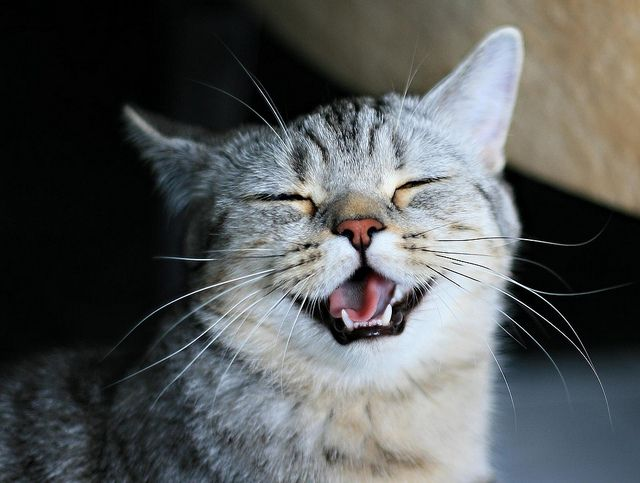

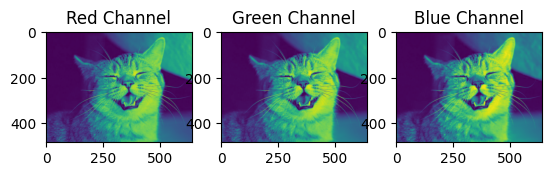

In [15]:
# define quantization tables
qY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # luminance quantization table
                [12, 12, 14, 19, 26, 48, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

qC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],  # chrominance quantization table
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]])

# read an image and show it
url_lenna = "http://www.lenna.org/len_std.jpg"
url_cat = "https://i.pinimg.com/originals/3d/3d/bc/3d3dbcf8a4f9dbee8fc608c8d62dbb8c.jpg"
imgOriginal = load_from_url(url_cat)
show(imgOriginal)

#TODO: show different channels
# Split the image into color channels
img_channels = cv2.split(imgOriginal)

# Define colors for each channel
channel_colors = ['Red', 'Green', 'Blue']

# Display each color channel with a different color
for i, (channel, color) in enumerate(zip(img_channels, channel_colors)):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns for RGB
    plt.imshow(channel, cmap='viridis') # We can choose cmap='gray' but 'viridis' ensures we see the original color
    plt.title(f'{color} Channel')

plt.show()

(648, 488) L None 0 255


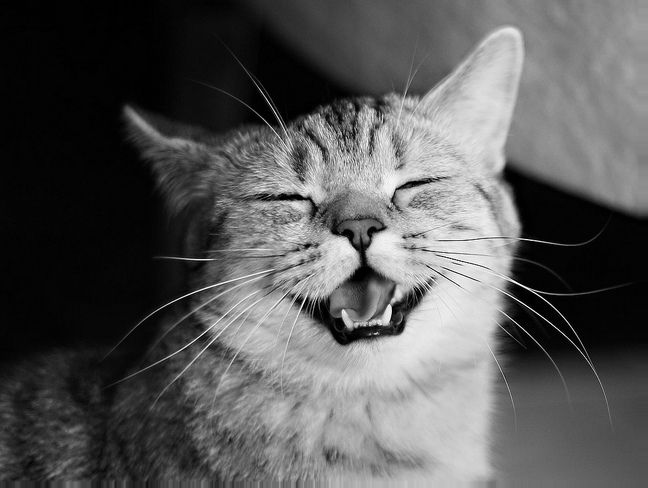

Number of blocks is: width (81)*height(61) = 4941
 Symbol	 Code	       Count	Frequency
  `0.0`	13069	          00	   20.73%
`257.0`	 9372	         110	   14.86%
 `-1.0`	 6810	         011	    10.8%
  `1.0`	 6704	         010	   10.63%
  `2.0`	 4056	        1001	    6.43%
 `-2.0`	 2747	       11110	    4.36%
  `3.0`	 2240	       10110	    3.55%
 `-3.0`	 1360	      111110	    2.16%
 `63.0`	 1346	      111010	    2.13%
  `4.0`	 1293	      111000	    2.05%
  `5.0`	  913	      100011	    1.45%
 `-4.0`	  727	     1111111	    1.15%
  `6.0`	  668	     1110110	    1.06%
`-62.0`	  663	     1110010	    1.05%
  `7.0`	  535	     1010011	    0.85%
 `-5.0`	  535	     1010100	    0.85%
 `61.0`	  479	     1010001	    0.76%
 `62.0`	  363	     1000000	    0.58%
 `-6.0`	  349	    11101111	    0.55%
  `8.0`	  326	    11100110	    0.52%
`-63.0`	  300	    10111100	    0.48%
  `9.0`	  298	    10111010	    0.47%
 `58.0`	  294	    10111000	    0.47%
 `51.0`	  274	    10101100	    0.43%
 `-7.0`	  271	    1010101

In [16]:
# For students
# TODO: Write your 'main' code
# convert color image into gray image (or image in YCrCb space)

# This is just an example of coding, you can make your code differently

# ADVICE: create an other 'Code cell' and write/test your code gradually there
# since the code given here is not exectable yet

img = cv2.cvtColor(imgOriginal, cv2.COLOR_RGB2YCrCb)

# define block size
blockSize = 8

# color
# First, you can work with only gray images for simplicity

# We apply padding to the image to ensure full slicing by 8x8 blocks
padded_height = img.shape[0] % blockSize
padded_width = img.shape[1] % blockSize
padded_img = np.pad(img, ((0, blockSize-padded_height), (0, blockSize-padded_width), (0, 0)), mode='edge')

width = len(padded_img[0])
height = len(padded_img)

# luminance channel
img_luminance = padded_img[:, :, 0]

# chrominance channels
img_chrominance_red = padded_img[:, :, 1]
img_chrominance_blue = padded_img[:, :, 2]

# image planes for computing
img_gray = np.zeros((height, width), np.float32) + img_luminance
img_cr = np.zeros((height, width), np.float32) + img_chrominance_red
img_cb = np.zeros((height, width), np.float32) + img_chrominance_blue

#show img_gray
show(img_gray.astype('uint8'))

# We compute the amount of blocks we'll need for later
# compute number of blocks
num_blocks_w = len(img_gray[0]) // blockSize
num_blocks_h = len(img_gray) // blockSize

# We perform a first cutting in blocks of the defined size (not the actual blocks used later)
blocks = [img_gray[x:x+blockSize,y:y+blockSize]
          for x in range(0,img_gray.shape[0],blockSize)
          for y in range(0,img_gray.shape[1],blockSize)]

print(f"Number of blocks is: width ({num_blocks_w})*height({num_blocks_h}) = {len(blocks)}")

# for color images -----
# chrominance channels should be sub-sampled with different sub-sampling factors
# A very simple way: using a 2x2 averaging filter # another type of filter can be used
# then we can work with the sub-sampled version...
#--------------------

def apply_padding(plane, blockSize=blockSize):
  '''
  Applies padding to an image knowing the block size.
  '''
  # Calculate the size of the padding
  padded_height = len(plane) % blockSize
  padded_width = len(plane[0]) % blockSize

  return np.pad(plane, ((0, blockSize-padded_height), (0, blockSize-padded_width)), mode='edge')


def encode_jpeg(plane, qMatrix, blockSize=blockSize):

  ZZ_Blk = np.zeros(blockSize * blockSize) #1D

  vRLC = []

  size_vRLC = 0

  encoding_id = 0

  # Compression intensity factor
  fc = 1

  # define empty matrices to store Dct
  imgDct = np.zeros_like(plane, dtype=np.float32)

  # define empty matrices to store the quantized values
  imgQ = np.zeros_like(plane, dtype=np.float32)

  # Image plane dimensions
  width = len(plane[0])
  height = len(plane)

  num_blocks_w = width // blockSize
  num_blocks_h = height // blockSize

  # Encoding loop
  for i in range(num_blocks_h):
      for j in range(num_blocks_w):
          # Extract the block and centering
          block = plane[i * blockSize:(i + 1) * blockSize, j * blockSize:(j + 1) * blockSize] - 128

          # DCT
          dct_block = cv2.dct(block)
          imgDct[i * blockSize:(i + 1) * blockSize, j * blockSize:(j + 1) * blockSize] = dct_block

          # Quantization (using the quantization table Q)
          quantized_block = np.round(dct_block / (qMatrix/fc))
          imgQ[i * blockSize:(i + 1) * blockSize, j * blockSize:(j + 1) * blockSize] = quantized_block

          # ZigZag (1D)
          ZZ_Blk = zigzag(quantized_block)

          # Run-Length Coding (1D)
          vRLC.extend(rlencode(ZZ_Blk))

  return vRLC

yRLC = encode_jpeg(img_gray, qY)
rRLC = encode_jpeg(img_cr, qC)
bRLC = encode_jpeg(img_cb, qC)

# Huffman Encoding
mat_table = construct_huffman_table(yRLC)
mat_encoded = encode_huffman(yRLC, mat_table)

cr_mat_table = construct_huffman_table(rRLC)
cr_mat_encoded = encode_huffman(rRLC, cr_mat_table)

cb_mat_table = construct_huffman_table(bRLC)
cb_mat_encoded = encode_huffman(bRLC, cb_mat_table)

# Huffman table display
counts = count_symbols(yRLC)
display_huffman_table(yRLC, bintree_to_table(compute_huffman_tree(yRLC, counts)))

In [17]:
# For testing a block, all steps (notably zigzag, rlc) are OK
# Note: all code re-pasted in the main cell above

**Compute compression rates at different stages**

In [18]:
# number of bits in original image
H, W, C = img.shape
print("H;",H,", W:",W,", C:",C)

size_yRLC = len(yRLC)

print("Number of bits (original):", img.size)
print("Number of elelemnts (yRLC):", size_yRLC)
print("Number of bits (encoded):", len(mat_encoded))
print("Compression ratio:", img.size/len(mat_encoded))

H; 483 , W: 640 , C: 3
Number of bits (original): 927360
Number of elelemnts (yRLC): 63053
Number of bits (encoded): 278862
Compression ratio: 3.325515846547755


**Decodage**

In [19]:
# Huffman decoding
decoded = decode_huffman(mat_encoded, mat_table)
print("luminance decoding",len(decoded))

luminance decoding 63053


In [20]:
np.array_equal(decoded, yRLC)

True

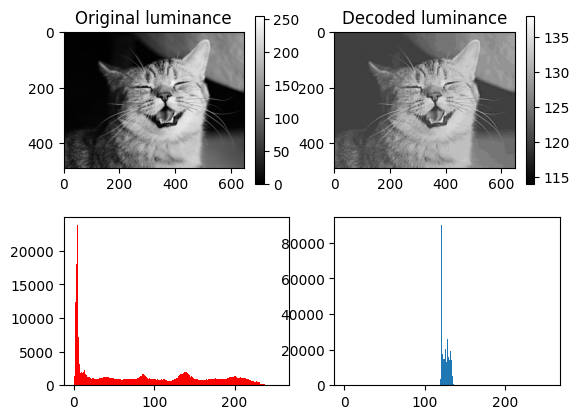

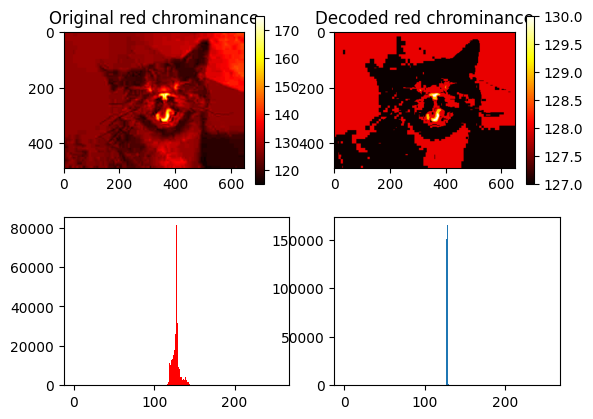

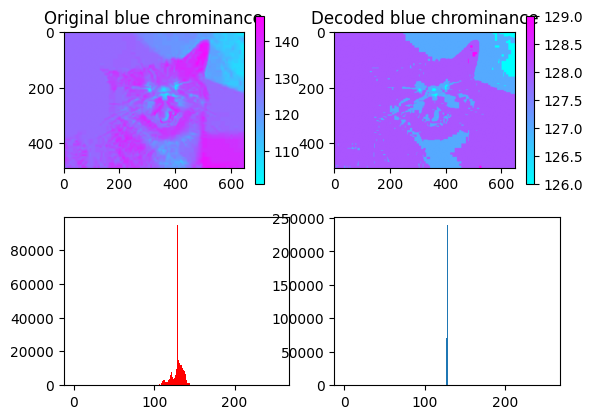

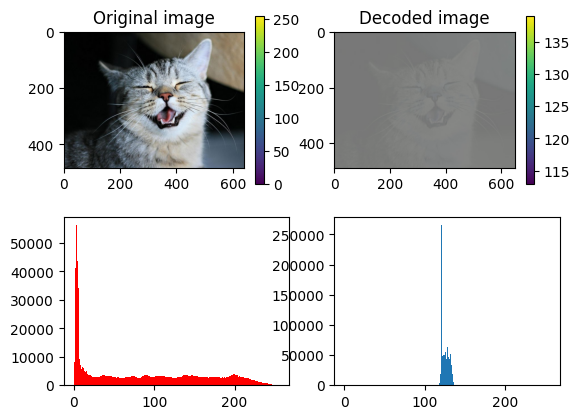

In [21]:
def decode_jpeg(encoded_array, original_img):
  '''
  Decodes a jpeg array of an image doing the reverse jpeg encodig pipeline.
  Assumes the used block size is 8x8.
  '''
  # Run-Length Decoding
  decoded_rl = rldecode(encoded_array)

  # Reverse ZigZag
  decoded_blocks = [reverse_zigzag(decoded_rl[i * blockSize*blockSize: (i + 1) * blockSize*blockSize])
    for i in range(len(decoded_rl) // (blockSize*blockSize))]

  # Initialize the image
  decoded_matrix = np.zeros_like(original_img)

  # Combine the blocks to reconstruct the image
  for i in range(num_blocks_h):
      for j in range(num_blocks_w):
          block = decoded_blocks[i * num_blocks_w + j]

          # Decenters the pixel values + idct operation
          decoded_matrix[i * blockSize:(i + 1) * blockSize, j * blockSize:(j + 1) * blockSize] = cv2.idct(block) + 128

  # Clip the values to the valid range (0 to 255)
  return np.clip(decoded_matrix, 0, 255).astype('uint8')


def plot_jpeg_results(original_img, decoded_img, title="", cmap=""):
  '''
  Plots the passed images with their histograms.
  '''
  # We create a new figure
  plt.figure()

  # Plots the images with the color histogram bar
  plt.subplot(2,2,1)
  plt.title(f"Original {title}")
  if cmap == "":
    plt.imshow(original_img)
  else:
    plt.imshow(original_img, cmap=cmap)
  plt.colorbar()

  plt.subplot(2,2,2)
  plt.title(f"Decoded {title}")
  if cmap == "":
    plt.imshow(decoded_img)
  else:
    plt.imshow(decoded_img, cmap=cmap)
  plt.colorbar()

  # Plots the histograms of each image
  plt.subplot(2,2,3)
  plt.hist(original_img.ravel(), bins=range(256), fc='k', ec='k', color='red')

  plt.subplot(2,2,4)
  plt.hist(decoded_img.ravel(), bins=range(256), fc='k', ec='k')


# Show the reconstructed luminance image
reconstructed_y = decode_jpeg(yRLC, img_gray)
plot_jpeg_results(img_gray, reconstructed_y, "luminance", "gray")

# Show the reconstructed red chrominance image
reconstructed_r = decode_jpeg(rRLC, img_cr)
plot_jpeg_results(img_cr, reconstructed_r, "red chrominance", "hot")

# Show the reconstructed blue chrominance image
reconstructed_b = decode_jpeg(bRLC, img_cb)
plot_jpeg_results(img_cb, reconstructed_b, "blue chrominance", "cool")

# Calculate the size of the padding of the complete reconstructed image
reconstructed_img = np.zeros_like(padded_img)

# We assemble every plane computed for the YCrCb image
reconstructed_img[:,:,0] = reconstructed_y
reconstructed_img[:,:,1] = reconstructed_r
reconstructed_img[:,:,2] = reconstructed_b

# We change the color space for a better quality plot
reconstructed_img = cv2.cvtColor(reconstructed_img, cv2.COLOR_YCrCb2BGR)

# Show the reconstructed image
plot_jpeg_results(imgOriginal, reconstructed_img, "image")

We can see that the resulting image does not have a good contrast, also visible with the histograms where it's shown that the average values of most pixels is around the centering value.  
  
We applied a compression factor at the encoding stage. We can see that by letting the quantification matrix at full value, the histogram shrinks around the centering, averaging the value of all pixels, thus reducing the contrast of the image.

We get a better image with also a better contrast when reducing the values of the quantification matrix. Though this could be dealt with by normalizing all pixel values to expand their values range, a simple normalization isn't really effective if pixel values are too close together. This is why we do a normalization for each channel, by equalizing each histogram.

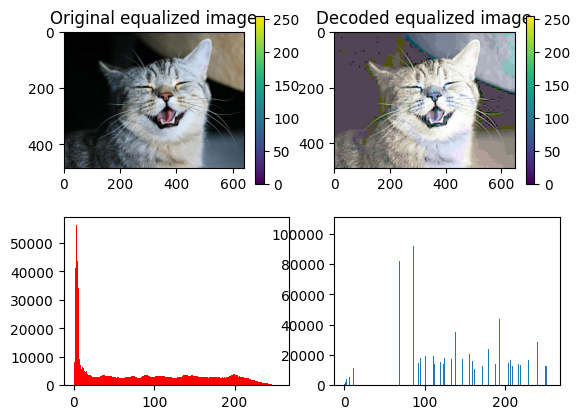

In [22]:
def normalize_image(image):
  '''
  Normalizes pixel values by equalizing the histogram of the passed image.
  '''
  r_image, g_image, b_image = cv2.split(image)

  r_image_eq = cv2.equalizeHist(r_image)
  g_image_eq = cv2.equalizeHist(g_image)
  b_image_eq = cv2.equalizeHist(b_image)

  return cv2.merge((r_image_eq, g_image_eq, b_image_eq))


# We normalize our decoded image
reconstructed_img = normalize_image(reconstructed_img)

# Show the equalized image
plot_jpeg_results(imgOriginal, reconstructed_img, "equalized image")

After the normalization we can easily see the effects of the heavy compression on the image with color distortion, less and bigger areas of color and less detail on dark areas.